# Classification and Regression with a Neural Network in Pytorch

Welcome to your first programming assignment! 
In this assignment you will build your first classification and regression neural networks.
This assignment is a 'step-through' guide to implement a simple fully-connected neural network in Pytorch.

* In the first part of this exercise, you will implement a neural network with a 2 dimensional input. Your dataset is based on a two circles-shaped groups for classification.

* Then, in the second part of this exercise, you will implement a regression model for predicting the output of a two dimensional function.

# Packages
Let's first import all the packages that you will need during this part of assignment.

Feel free to use another libraries if you want to.

In [2]:
import numpy as np
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
import sklearn.metrics as metrics
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.optim import SGD


# Dataset

In [7]:
random_num = 0
np.random.seed(random_num)
torch.manual_seed(random_num)
x, y = make_circles(500, noise=0.075)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

**Visualize the dataset using matplotlib:**

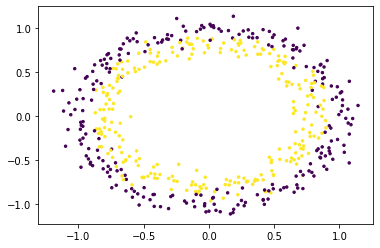

In [138]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=6)


# Simple Logistic Regression

1. Implement a 2-class classification neural network with a zero hidden layer.
2. Plot loss vs epoch.
3. Plot AUC vs epoch for train and test sets. 
4. Plot ROC curve and calculate AUC for the test set.
5. Plot the learned decision boundary.
6. Briefly interpret graph's results.   

How you will do it:

* Prepare the Data.
* Define the Model.
* Train the Model.
* Evaluate the Model.
* Visualization.

**Define the Model:**

In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self, num_inputs, ):
        super(LogisticRegression, self).__init__()
        self.lin1 = nn.Linear(num_inputs, 1)

    def forward(self, x):
        return torch.sigmoid(self.lin1(x))

**Training and validation:**

In [6]:
def data_to_tensor(x_train, x_test, y_train, y_test):
    x_train = torch.from_numpy(x_train.astype(np.float32))
    x_test = torch.from_numpy(x_test.astype(np.float32))
    y_train = torch.from_numpy(y_train.astype(np.float32))
    y_test = torch.from_numpy(y_test.astype(np.float32))

    y_train = y_train.view(y_train.shape[0], 1)
    y_test = y_test.view(y_test.shape[0], 1)
    return x_train, x_test, y_train, y_test

In [148]:
NUM_INPUTS = 2
LR = 1
MOMENTUM = 0.9
NUMBER_OF_EPOCHS = 1000

model = LogisticRegression(num_inputs=NUM_INPUTS)
optimizer = SGD(model.parameters(), lr=LR, momentum=MOMENTUM)
criterion = nn.BCELoss()
number_of_epochs = NUMBER_OF_EPOCHS
x_train, x_test, y_train, y_test = data_to_tensor(x_train, x_test, y_train, y_test)

epochs = []
losses = []
preds = []
rocs = []
for epoch in range(number_of_epochs):
    y_prediction = model(x_train)
    loss = criterion(y_prediction, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    epochs.append(epoch)
    losses.append(loss.item())
    preds.append(y_prediction.detach().numpy())
    fpr, tpr, threshold = metrics.roc_curve(y_train, preds[epoch])
    roc_auc = metrics.auc(fpr, tpr)
    rocs.append(roc_auc)
    if (epoch + 1) % 100 == 0:
        print('epoch:', epoch + 1, ',loss=', loss.item())

epoch: 100 ,loss= 0.6896194219589233
epoch: 200 ,loss= 0.689618706703186
epoch: 300 ,loss= 0.689618706703186
epoch: 400 ,loss= 0.689618706703186
epoch: 500 ,loss= 0.689618706703186
epoch: 600 ,loss= 0.689618706703186
epoch: 700 ,loss= 0.689618706703186
epoch: 800 ,loss= 0.689618706703186
epoch: 900 ,loss= 0.689618706703186
epoch: 1000 ,loss= 0.689618706703186


In [9]:
y_prediction_test = model(x_test)
fpr, tpr, threshold = metrics.roc_curve(y_test.detach().numpy(), y_prediction_test.detach().numpy())
roc_auc = metrics.auc(fpr, tpr)

**Visualizing the plots**:

No handles with labels found to put in legend.


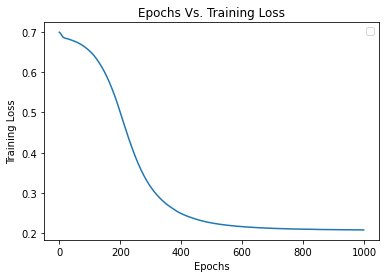

In [12]:
plt.plot(epochs, losses)
# plt.figure(figsize=(16,8))
plt.title('Epochs Vs. Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()

No handles with labels found to put in legend.


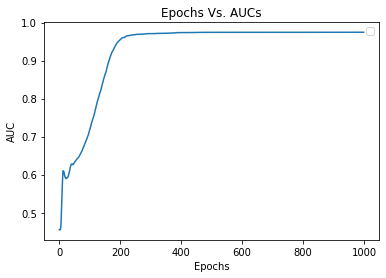

In [13]:
plt.plot(epochs, rocs)
plt.title('Epochs Vs. AUCs')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

0.9681257968550786


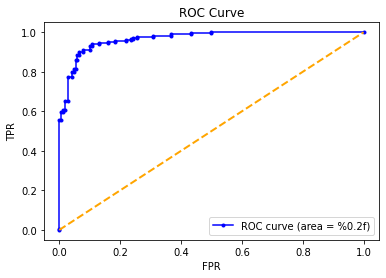

In [19]:
plt.plot(fpr, tpr, marker='.', label='ROC curve (area = %0.2f)', color='blue')
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
print(roc_auc)

In [126]:
epoch
fpr, tpr, threshold = metrics.roc_curve(y_train.detach().numpy(), preds[epoch])
plt.plot(fpr, tpr, marker='.', label='ROC curve (area = %0.2f)', color='blue')
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')

SyntaxError: invalid syntax (3923929124.py, line 1)

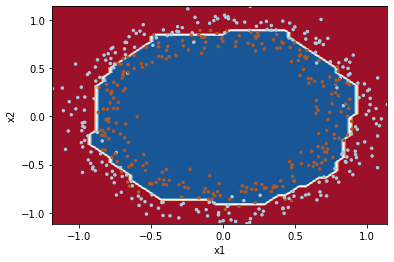

In [18]:
x_range = np.linspace(min(x[:, 0]), max(x[:, 0]))
y_range = np.linspace(min(x[:, 1]), max(x[:, 1]))
xx, yy = np.meshgrid(x_range, y_range)
grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
pred_func = model.forward(grid)
z = pred_func.view(xx.shape).detach().numpy()
z[z >= 0.5] = 1
z[z < 0.5] = 0
plt.contourf(xx, yy, z, cmap='RdBu')

plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Paired', s=6
            )


7. Is the decision boundary linear or nonlinear in the case of a logistic regression? Explain.

    The decision boundary is linear as we can see at the plot. M

# Classification with Neural Networks

After you implemented "classical" logistic regression, now you will be implementing a neural network with one or more hidden layers.
You will need to choose the number of hidden layers and nodes in a feedforward neural network, activation function, the type of optimizer and its hyperparmeters which will give you the best result. Remember, we don't want to overfit the training data, we want to generalize the solution for new data not seen during training. 

Plot the same graphs as in the previous sections and explain the similarities and differences. 

**Define the Model:**

In [4]:
class DeepLogisticRegression(nn.Module):
    def __init__(self, num_inputs, num_neurons):
        super(DeepLogisticRegression, self).__init__()
        self.lin1 = nn.Linear(num_inputs, num_neurons)
        self.lin2 = nn.Linear(num_neurons, 1)
        self.relu = nn.ReLU()
        self.sig = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.lin1(x))
        x = self.sig(self.lin2(x))
        return x


**Training and validation:**

In [17]:
NUM_INPUTS = 2
LR = 0.1
MOMENTUM = 0.9
NUMBER_OF_EPOCHS = 1000
NUM_NEURONS = 5

model = DeepLogisticRegression(num_inputs=NUM_INPUTS, num_neurons=NUM_NEURONS)
optimizer = SGD(model.parameters(), lr=LR, momentum=MOMENTUM)
criterion = nn.BCELoss()
number_of_epochs = NUMBER_OF_EPOCHS
# x_train, x_test, y_train, y_test = data_to_tensor(x_train, x_test, y_train, y_test)

epochs = []
losses = []
preds = []
rocs = []
for epoch in range(number_of_epochs):
    y_prediction = model(x_train)
    loss = criterion(y_prediction, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    epochs.append(epoch)
    losses.append(loss.item())
    preds.append(y_prediction.detach().numpy())
    fpr, tpr, threshold = metrics.roc_curve(y_train, preds[epoch])
    roc_auc = metrics.auc(fpr, tpr)
    rocs.append(roc_auc)
    if (epoch + 1) % 100 == 0:
        print('epoch:', epoch + 1, ',loss=', loss.item())


epoch: 100 ,loss= 0.6759365797042847
epoch: 200 ,loss= 0.6221657395362854
epoch: 300 ,loss= 0.47462281584739685
epoch: 400 ,loss= 0.3415638208389282
epoch: 500 ,loss= 0.2788104712963104
epoch: 600 ,loss= 0.25397926568984985
epoch: 700 ,loss= 0.2424413412809372
epoch: 800 ,loss= 0.23743000626564026
epoch: 900 ,loss= 0.2316419780254364
epoch: 1000 ,loss= 0.22940808534622192


**Visualizing the plots:**

In [3]:
### START CODE HERE ###


8. Why does a neural network need a non-linear activation function? try to figure out what heppan when you remove the activation function and explain the results.

# Regression with Neural Networks

In this part of the excercise you will need to implement a regression model using neural networks. The model should predict the output of a trigonometric function of two variables. Your data set is based on a meshgrid. Your task is to create a list of points that would correspond to a grid and use it for the input of your neural network. Then, build your neural networks and find the architecture which gives you the best results.
1. Plot the surface from the overall data and compare it to your predicted test sets.
2. Which loss function and validation metric did you choose?
3. Plot the loss and validation metrics vs epoch for the training and test sets.
4. Build a new neural network and try overfitting your training set. Show the overfitting by using learning curve plots. 
    **Note**: You can use plt.ylim() function to better focus on the changes in the trends.

# Packages 

First import all the packages that you will need during this part of assignment.

Feel free to use another libraries if you want to.

In [1]:
import numpy as np
import torch
from torch.autograd import Variable
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import cm

**Generate data:**

In [ ]:
np.random.seed(random_num)
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx) * np.cos(yy) + 0.1 * np.random.rand(xx.shape[0], xx.shape[1])

**Define the Model:**

In [ ]:
### START CODE HERE ###


**Training and validation:**

In [ ]:
### START CODE HERE ###


**Visualizing the plots:**

In [ ]:
### START CODE HERE ###


### Build a new neural network and try overfitting your training set

**Generate data:**

In [ ]:
np.random.seed(random_num)
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx) * np.cos(yy) + 0.1 * np.random.rand(xx.shape[0], xx.shape[1])

**Define the Model:**

In [ ]:
### START CODE HERE ###


**Training and validation:**

In [5]:
### START CODE HERE ###


**Visualizing the plots:**

In [6]:
### START CODE HERE ###


5. Briefly explain graph's results.

6. How does your metric value differs between the training data and the test data and why?
